In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [2]:
parfile= "J0835-4510.par"
timfile= "J0835-4510_p2.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.476782'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.67931'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory.global_clock_corrections): File index.txt to be downloaded due to download policy if_expired: https://raw.githubusercontent.

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57522.2281783717468866 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              834.752014        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) +/- 0.0 d frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 8:35:20.63268500  (hourangle) +/- 0h00m00.22879s frozen=False),
    AngleParameter( DECJ                -45:10:33.80438000 (deg) +/- 0d00m01.0323s frozen=False),
    floatParameter( PMRA                -49.68            (mas / yr) +/- 0.06 mas / yr frozen=True),
    floatParameter( PMDEC               29.9              (mas / yr) +/- 0.1 mas / yr frozen=True)),
  DispersionDM(
    floatParameter( DM                  67.99             (pc / cm3) +/- 0.01 pc / cm3 frozen=True),
    floatParameter( DM1      

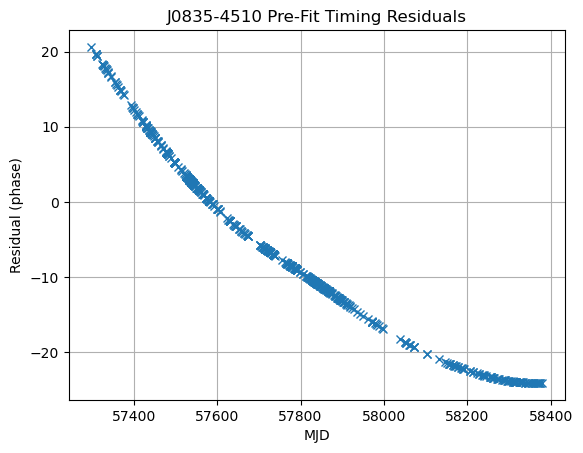

In [3]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [4]:
t_all.print_summary()

Number of TOAs:  722
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57298.061 to 58378.952
Date span: 2015-10-03 01:27:26.933459036 to 2018-09-17 22:50:24.049688160
most TOAs (722):
  Min freq:      832.480 MHz
  Max freq:      837.041 MHz
  Min error:     0.361 us
  Max error:     475 us
  Median error:  2.26 us



In [5]:
error_ok = t_all.table["error"] <= 100* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  700
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57298.061 to 58378.952
Date span: 2015-10-03 01:27:26.933459036 to 2018-09-17 22:50:24.049688160
most TOAs (700):
  Min freq:      832.480 MHz
  Max freq:      837.041 MHz
  Min error:     0.361 us
  Max error:     88.7 us
  Median error:  2.21 us



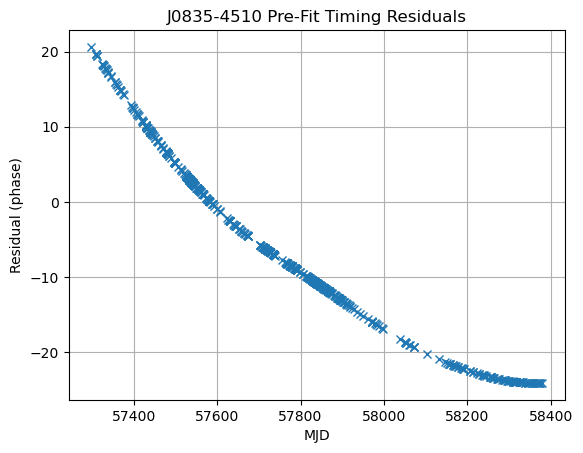

In [6]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [7]:
f = pint.fitter.GLSFitter(t, m)
f.fit_toas(maxiter=100,debug=True)

17843236.052906148

In [8]:
f.print_summary()


Fitted model using generalized_least_square method with 13 free parameters to 700 TOAs
Prefit residuals Wrms = 858610.2094139855 us, Postfit residuals Wrms = 1702655.3418838156 us
Chisq = 17996196.542 for 686 d.o.f. for reduced Chisq of 26233.523

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0835-4510 J0835-4510                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       56666.6                      57298.1 d 
FINISH                        58379                        58379 d 
DILATEFREQ                        N                              None
DMDATA                            N                   

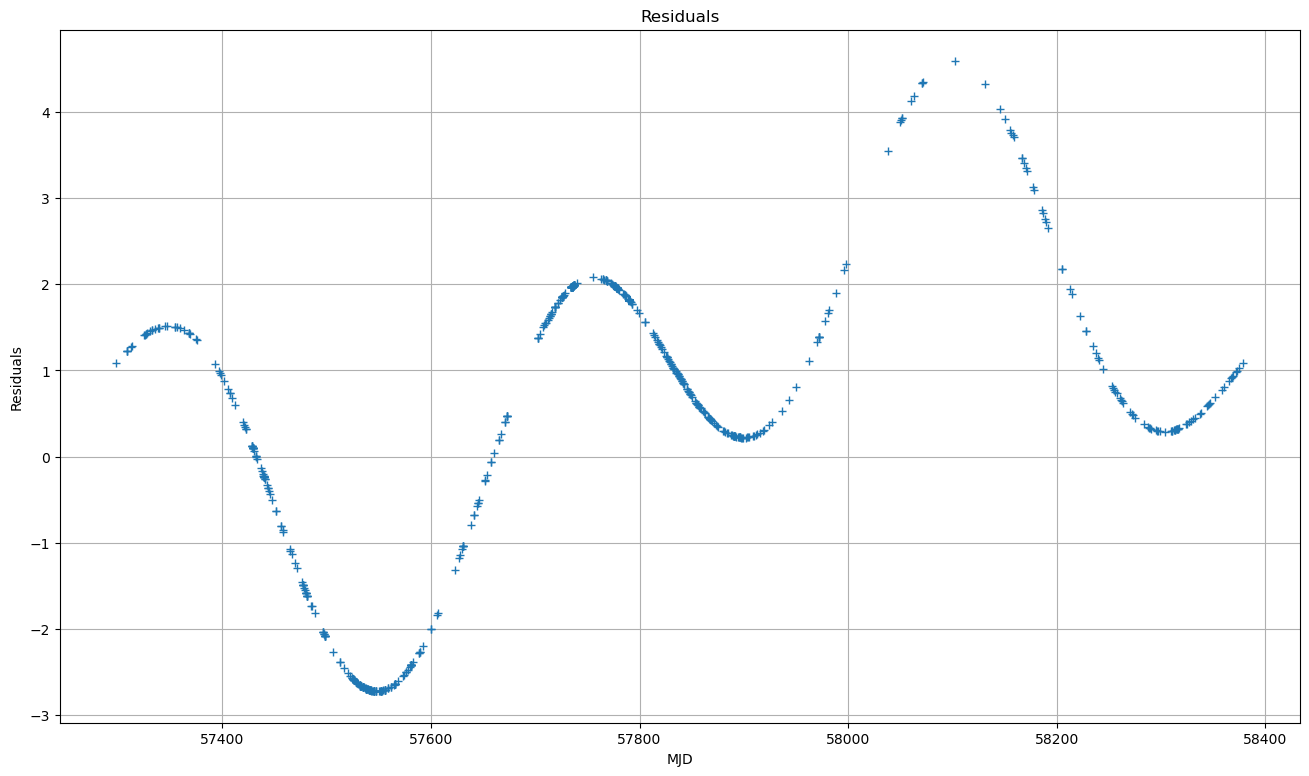

In [9]:
f.plot()

In [10]:
nu1=11.18676692
nu2=11.1866367
nudot1=-1.329057e-11
nudot2=-1.6662e-11
dt_days=(57298.1+58379)/2-(56666.6+57290)/2
dt=dt_days*24*60*60

In [11]:
n=1+(nu1*nudot2-nu2*nudot1)/(nudot1*nudot2*dt)
print(n)

-2290.5508776527486


In [12]:
print(dt_days)

860.25


In [ ]:
#using WLS fitter

In [13]:
f2 = pint.fitter.WLSFitter(t, m)
f2.fit_toas(maxiter=100,debug=True)

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.3063754257144373*F0 + 0.013940196313465231*F1 + 5.040261162638765e-11*GLF0D_1 + 1.8598803379195732e-11*GLTD_1 + -0.12950113396334006*GLF1_2 + -0.9553882228256393*GLF0_2 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.2820794958653411*Offset + -1.746496735311793e-11*GLF0D_1 + -0.10764536097956441*F1 + -0.2950797518261135*F0 + -0.5269966698870364*GLF0_2
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.43067645769855795*GLF0_2 + 0.3203128152298284*F0 + 0.10764536098743537*F1 + 1.1

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.829653146255123*GLF1_2 + 0.31703184347382135*GLF0D_1 + 0.2305104790078163*GLF0_3 + 0.05033551451457699*GLF0_2 + 4.554903586200533e-08*GLTD_1 + -2.743219919290188e-05*GLTD_3 + -0.08930830418859527*F1 + -0.23051276140960575*GLF0D_3 + -0.42801272205843016*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.49524327156545206*GLF0D_1 + 0.18823502461141506*Offset + 0.1448802718449804*GLF1_2 + 0.00011900512156100135*GLTD_3 + 7.115327363914094e-08*GLTD_1 + -0.015595687735365014*F1 + -0.03691399559706445*F0 + -0.42941466671796985*GLF0_2 + -0.9999900985881398*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-p

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.5117950365765498*GLF1_2 + 0.11146265533196921*GLF0D_1 + 0.08654662605310996*GLF0D_3 + 0.020789923785148563*F0 + 1.2421788769147395e-09*GLTD_3 + -1.8678418570254296e-09*GLTD_1 + -1.945893831169814e-09*GLF1_3 + -0.05509236129663186*F1 + -0.08654662537119527*GLF0_3 + -0.43503635310000294*Offset + -1.0*GLF0_2
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.30840601236758064*GLF0_2 + 0.25002778976386364*Offset + 0.007153911705133432*GLF0D_3 + 1.4158560188395027e-08*GLTD_1 + 1.0267807664841953e-10*GLTD_3 + -1.6084658485752288e-10*GLF1_3 + -0.007153911648765922*GLF0_3 + -0.10764536246643122*F1 + -0.3660936044793678*F0 + -0.844906475573166*GLF

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.42592331984649473*GLF0_2 + 0.1915554592959416*GLF1_2 + 0.09188355741668304*GLF0_3 + 4.381842446100735e-07*GLTD_1 + 2.3548223655395106e-08*GLTD_3 + -3.543603359149832e-11*GLF1_3 + -0.019574905645819762*F0 + -0.020620101653585514*F1 + -0.09188355966692772*GLF0D_3 + -0.4186331387257915*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999755098428*GLF0_3 + 0.304149604091857*GLF1_2 + 0.12857522378715847*Offset + 0.09857130365717065*GLF0D_1 + 2.5628331963655213e-07*GLTD_3 + -3.857884401356178e-10*GLF1_3 + -4.3192538110333876e-08*GLTD_1 + -0.03274028949581675*F1 + -0.09232993609265518*F0 + -0.21626882675585338*GLF0_2 + -1.0*GLF0D_

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.3787846939221915*GLF1_2 + 2.8012224105241284e-08*GLTD_3 + 1.7581608980061524e-09*GLTD_1 + -7.26168559299147e-09*GLF1_3 + -0.04077441531116825*F1 + -0.04606486873555955*GLF0D_1 + -0.06453183709766008*Offset + -0.06842989019428106*F0 + -0.33429606922563254*GLF0_2 + -0.9999999980994424*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.4776102402452948*Offset + 0.22830293925946782*GLF0_3 + 3.4555870244623776e-09*GLTD_1 + 1.6578642894711778e-09*GLF1_3 + -6.395273102382115e-09*GLTD_3 + -0.0905384483254358*GLF0D_1 + -0.10764536138644046*F1 + -0.22608677683780276*GLF0_2 + -0.22830293969337048*GLF0D_3 + -0.35806738162179635*F

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.3426713738269784*Offset + 0.038935083481087054*GLF0_3 + 4.471523345165201e-09*GLTD_3 + 1.3977553171069883e-09*GLTD_1 + -3.4230003224931575e-11*GLF1_3 + -0.02756971934760248*GLF0D_1 + -0.038935082839405936*GLF0D_3 + -0.10764536117451756*F1 + -0.3145525732150506*F0 + -0.43425031669544634*GLF0_2
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.7471427523066166*GLF0_3 + 0.27874056651617907*F0 + 0.15437300833318582*GLF0D_1 + 0.010880734786932678*F1 + 8.580606305576055e-08*GLTD_3 + -6.568512408807703e-10*GLF1_3 + -7.826554121975818e-09*GLTD_1 + -0.1010794508746061*GLF1_2 + -0.7471427399930991*GLF0D_3 + -0.8703532740426992*Offset + -1.0*GLF0_2

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.8114712322012042*GLF0D_1 + 0.3725291517160502*GLF0_3 + 0.09270804529552423*GLF1_2 + 0.07982848783181064*F0 + 2.9765239864116022e-08*GLTD_1 + 8.412604246211513e-10*GLF1_3 + -3.2914089607571616e-08*GLTD_3 + -0.009979594072135028*F1 + -0.08311948077977545*Offset + -0.37252915309054474*GLF0D_3 + -1.0*GLF0_2
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.6443614883167003*GLF0D_1 + 0.13912812724222615*F0 + 0.051442171224917635*Offset + 0.04596929825420377*F1 + 8.83530575347801e-08*GLTD_3 + 2.363555855903571e-08*GLTD_1 + -2.2582403451406654e-09*GLF1_3 + -0.25539611631424847*GLF0_2 + -0.42704395478472984*GLF1_2 + -0.9999999963103685*GLF0_3
W

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.7666886333798897*GLF1_2 + 0.14075168980146582*GLF0_2 + 0.09467881614211814*GLF0_3 + 3.5521057688850305e-09*GLTD_3 + -2.4694577788064605e-10*GLF1_3 + -3.68797301617375e-08*GLTD_1 + -0.0825304709408172*F1 + -0.09467881656466472*GLF0D_3 + -0.19397978119139964*F0 + -0.23953196152329492*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999955370512*GLF0_3 + 0.17579431995833483*F0 + 0.14065158479316586*GLF0_2 + 0.04853029159283335*F1 + 3.751742862953592e-08*GLTD_3 + -2.608246448182718e-09*GLF1_3 + -3.660568090918922e-09*GLTD_1 + -0.09925687188279571*GLF0D_1 + -0.3145482222602632*Offset + -0.4508349523946344*GLF1_2 + -1.0*GLF0D_3
W

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.6805356976507544*GLF1_2 + 0.18129947341154548*GLF0_3 + 0.02733479980540894*GLF0_2 + 2.1166967185208788e-10*GLF1_3 + -3.2171069957407795e-08*GLTD_3 + -3.120276137387925e-07*GLTD_1 + -0.07325647876569738*F1 + -0.1269517024077411*F0 + -0.18129947693358714*GLF0D_3 + -0.4133187067349243*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.7951684782327267*Offset + 0.29912541406575494*GLF0D_1 + 0.2887968261270288*GLF0D_3 + 9.333540770238108e-08*GLTD_1 + 5.1246165011861966e-08*GLTD_3 + -3.371677762387696e-10*GLF1_3 + -0.10764537063236568*F1 + -0.28879682051667754*GLF0_3 + -0.28968434413534655*GLF0_2 + -0.4095879790001662*F0
W

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.3030229628696023*GLF1_2 + 0.18309847958650496*GLF0_2 + 0.11165578566850581*GLF0_3 + 1.8490812255910904e-08*GLTD_1 + 5.364223034456984e-09*GLTD_3 + -2.202017935227692e-10*GLF1_3 + -0.004242481204148358*F0 + -0.032619018145832734*F1 + -0.11165578552720505*GLF0D_3 + -0.5604531437472967*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.3067394589353459*Offset + 0.2705348686077782*GLF1_2 + 0.1292528858099798*GLF0D_1 + 4.8042499658023406e-08*GLTD_3 + -1.9721517540088094e-09*GLF1_3 + -2.389992009255387e-09*GLTD_1 + -0.029121823356915332*F1 + -0.03076311791835721*GLF0_2 + -0.13173569638604035*F0 + -0.9999999987345046*GLF0D_

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.7207210871707596*GLF0_3 + 0.31136269251803067*F0 + 0.04012144215583908*F1 + 6.527809238889312e-09*GLTD_1 + 1.0093825594247287e-09*GLF1_3 + -1.0118528708782544e-07*GLTD_3 + -0.23563818547382553*GLF0_2 + -0.37271873527102123*GLF1_2 + -0.5040390455272564*GLF0D_1 + -0.7207210902668669*GLF0D_3 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9996900353007656*GLF0_3 + 0.8246170697770288*GLF0D_1 + 0.5032953612584926*GLF0_2 + 0.037686934384818654*F1 + 1.4000839710670873e-09*GLF1_3 + -1.0679614671056398e-08*GLTD_1 + -1.4035099714412554e-07*GLTD_3 + -0.1244929935704393*F0 + -0.3501027163105569*GLF1_2 + -0.99969003959528*GLF0D_3
WARN

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.4366911700925719*Offset + 0.38895186179126434*GLF0_3 + 3.6572867862404186e-08*GLTD_3 + 8.049699146710798e-09*GLTD_1 + -4.202198056287576e-10*GLF1_3 + -0.10764536185880468*F1 + -0.15959632314937477*GLF0_2 + -0.19739829692237054*GLF0D_1 + -0.356788177604868*F0 + -0.3889518561634274*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999855307642*GLF0D_3 + 0.5270091884942478*GLF1_2 + 0.35709306300939736*Offset + 0.0003609945221778228*GLF0_2 + 2.2446157032924736e-09*GLTD_1 + 1.0803908118541352e-09*GLF1_3 + -9.40292911245976e-08*GLTD_3 + -0.05504335350396403*GLF0D_1 + -0.05673009459284525*F1 + -0.21873077308248784*F0 + -1.0*GLF0_3
W

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.38369993054640233*GLF0_2 + 0.2688593200136448*GLF1_2 + 0.009357503317353718*GLF0D_3 + 1.7506542115993166e-11*GLF1_3 + -5.007403535921878e-10*GLTD_3 + -6.851862789077234e-07*GLTD_1 + -0.009357503359385781*GLF0_3 + -0.02894138807592224*F1 + -0.04199628827016846*F0 + -0.39822547526486585*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.9113224010773836*GLF1_2 + 0.34232563375626573*Offset + 5.3512172042669065e-08*GLTD_3 + -1.86783494903994e-09*GLF1_3 + -2.175427020790813e-08*GLTD_1 + -0.031748992485171844*GLF0D_1 + -0.09809962664098985*F1 + -0.29564693797152164*F0 + -0.3570079669347392*GLF0_2 + -0.9999999955086096*GLF0

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999953114562*GLF0D_3 + 0.2971405991598148*GLF0_2 + 0.08740703176005483*F0 + 0.027374781243976968*F1 + 1.4023926571318098e-08*GLF1_3 + -1.0454801305751284e-08*GLTD_3 + -1.4896964988011309e-08*GLTD_1 + -0.22320584360275209*Offset + -0.2543052431587157*GLF1_2 + -0.31490309947695866*GLF0D_1 + -1.0*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.575664073205111*GLF1_2 + 0.5154689762242338*GLF0_2 + 0.15479698863978203*GLF0_3 + 1.618371855284575e-09*GLTD_3 + -2.170861631313897e-09*GLF1_3 + -4.730650227846965e-08*GLTD_1 + -0.03547536947694625*Offset + -0.061967562127042325*F1 + -0.15479698791401011*GLF0D_3 + -0.2094048147334235*F0 + -1.0*GLF0D_1

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9917995878633756*GLF0_2 + 0.3865834944705625*GLF0_3 + 0.026857632596083557*F1 + 0.02322041164813267*F0 + 1.3476397437780188e-07*GLTD_1 + 4.203853051258021e-09*GLTD_3 + -5.803969661583853e-09*GLF1_3 + -0.22920365130792392*Offset + -0.24950119729413756*GLF1_2 + -0.38658349254321883*GLF0D_3 + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999950144223*GLF0D_3 + 0.3913882780603912*GLF1_2 + 0.3460298762138982*GLF0_2 + 0.093633261591932*Offset + 7.466048948399743e-08*GLTD_1 + 1.5013499880267165e-08*GLF1_3 + -1.0874372796858745e-08*GLTD_3 + -0.04213114017562*F1 + -0.16323702694572215*F0 + -0.5540095995383572*GLF0D_1 + -1.0*GLF0_3
WARNING

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.7758683990397652*GLF0D_1 + 0.3766952985970798*F0 + 0.10764535923223173*F1 + 0.10151953521821701*GLF0D_3 + 1.7525359351711878e-08*GLTD_1 + 1.0514686921475867e-09*GLF1_3 + -1.3706028789094505e-09*GLTD_3 + -0.10151953534726695*GLF0_3 + -0.30276341043053956*GLF0_2 + -0.31158520134659523*Offset + -1.0*GLF1_2
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999987288103*GLF0D_3 + 0.1007839036043662*GLF1_2 + 0.036487752822647636*GLF0_2 + 0.030040234159000367*Offset + 1.0357302591919145e-08*GLF1_3 + -1.92918301571414e-09*GLTD_1 + -1.3500877266901981e-08*GLTD_3 + -0.010848919491597353*F1 + -0.03826791321903765*F0 + -0.08540718914306676*GLF0D_1 + -1.0*GLF

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999975452366*GLF0D_3 + 0.20787233089991147*GLF0_2 + 0.041616610624069815*Offset + 0.02501061928545115*F0 + 0.018999731546224335*F1 + 9.418939316104331e-08*GLTD_3 + 1.2768395780260405e-09*GLTD_1 + -2.0776824234660905e-09*GLF1_3 + -0.01724252682246765*GLF0D_1 + -0.17650302340685925*GLF1_2 + -1.0*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.14157363137944093*GLF0D_3 + 4.655864535247576e-08*GLTD_1 + 1.3334734458193691e-08*GLTD_3 + -2.941448930206744e-10*GLF1_3 + -0.10764536582099574*F1 + -0.1415736317269714*GLF0_3 + -0.19851091696016224*F0 + -0.27859330435455637*Offset + -0.475681100631358*GLF0_2 + -0.6287316820532314*GLF0D_1

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.6087684704300584*GLF1_2 + 0.2725045765698904*GLF0_3 + 0.005591794193120437*GLF0_2 + 2.980275363697268e-10*GLF1_3 + -1.9216239643090735e-08*GLTD_1 + -5.4625532485644195e-08*GLTD_3 + -0.06553109981064356*F1 + -0.0901707403207473*F0 + -0.2725045756243577*GLF0D_3 + -0.48962572693159173*Offset + -1.0*GLF0D_1
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.34065333391299374*GLF0D_1 + 0.10616775112105695*F0 + 0.03502391439237797*F1 + 6.546075205132497e-09*GLTD_1 + 1.0936582988822985e-09*GLF1_3 + -2.004573032924694e-07*GLTD_3 + -0.01248748470927743*Offset + -0.09484321461494206*GLF0_2 + -0.3253639054118756*GLF1_2 + -0.9999999965302128*GLF0D_3


WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF1_2 + 0.7658966204279164*Offset + 0.1878098169545535*GLF0D_1 + 0.07336200574238934*GLF0D_3 + 1.0405545501378316e-08*GLTD_1 + 1.8521291970782937e-09*GLTD_3 + -6.227263653168359e-10*GLF1_3 + -0.07336200575396258*GLF0_3 + -0.10764536210011356*F1 + -0.20623407155374499*GLF0_2 + -0.41197206597968783*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9341516646339544*GLF0_3 + 0.5784979894946244*GLF1_2 + 0.1696213598996724*GLF0_2 + 7.929459446188806e-09*GLF1_3 + -2.3584000665190433e-08*GLTD_3 + -5.540470486075194e-08*GLTD_1 + -0.06227261923884294*F1 + -0.12003037272297348*F0 + -0.3587906007726617*Offset + -0.934151664486581*GLF0D_3 + -1.0*GLF0D_1
WAR

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.4534772683766266*F0 + 0.22637926395626143*GLF0D_3 + 0.08848779141962901*F1 + 1.6007825662020623e-08*GLTD_3 + 3.3369663011813876e-09*GLTD_1 + -5.987347861220257e-10*GLF1_3 + -0.030424357733669995*GLF0D_1 + -0.22637926303621464*GLF0_3 + -0.35157204578896445*GLF0_2 + -0.8220307026292062*GLF1_2 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999959358146*GLF0_3 + 0.15685127450534495*GLF0_2 + 0.0638083868512343*F0 + 0.03207702186541404*GLF1_2 + 7.446366131881519e-08*GLTD_1 + 2.6448306503583657e-09*GLF1_3 + -7.071242020455158e-08*GLTD_3 + -0.0034529502599924813*F1 + -0.48498572375557136*Offset + -0.678913709731346*GLF0D_1 + -1.0*GLF0D_3

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.8586312285844641*GLF1_2 + 0.32065594721374696*GLF0_2 + 0.031064536174103385*GLF0D_1 + 0.01910048648940671*GLF0_3 + 2.969017209802722e-11*GLF1_3 + -1.730200259590904e-09*GLTD_1 + -2.2940600288176936e-09*GLTD_3 + -0.01910048668913334*GLF0D_3 + -0.09242766841481015*F1 + -0.461343231078018*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.07222754645298221*GLF1_2 + 1.201047932753602e-07*GLTD_3 + 3.5881362827295545e-09*GLTD_1 + -1.5544148751835591e-09*GLF1_3 + -0.007774960683496576*F1 + -0.01516806659493432*F0 + -0.01849086364662439*GLF0_2 + -0.02360169503365785*Offset + -0.06442265442418002*GLF0D_1 + -0.9999999895433561*GLF0

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.5130624296853732*GLF0_3 + 0.24519821396841526*F0 + 0.01576706172884315*F1 + 3.7591125875023805e-08*GLTD_1 + 1.9977795570682217e-08*GLTD_3 + -3.9887564085875906e-08*GLF1_3 + -0.14647231840021532*GLF1_2 + -0.23595203681747778*GLF0_2 + -0.5130624128056157*GLF0D_3 + -0.6854888850749555*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.7029880655838878*Offset + 0.29219859903648576*GLF1_2 + 0.2670885285712595*GLF0_2 + 0.23151337956385193*GLF0D_1 + 3.893833175838608e-08*GLTD_3 + -1.2695821107087475e-08*GLTD_1 + -7.774407507572337e-08*GLF1_3 + -0.03145382238016466*F1 + -0.23704042427265581*F0 + -0.9999999670999936*GLF0D_3
W

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.6557612234452896*GLF0_2 + 0.35567393172434514*GLF1_2 + 0.32754584498195727*GLF0_3 + 0.10947125089033714*GLF0D_1 + 7.812459025137896e-09*GLTD_1 + 3.443285857771609e-09*GLF1_3 + -6.688174138936808e-09*GLTD_3 + -0.0382866495928942*F1 + -0.32754584471411996*GLF0D_3 + -0.3450005360626784*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999991822915*GLF0D_3 + 0.8400787370815829*GLF1_2 + 0.375647557924722*Offset + 2.0419047313921962e-08*GLTD_3 + -8.59844829356927e-09*GLTD_1 + -1.0512377946569196e-08*GLF1_3 + -0.09043057806349397*F1 + -0.12048486144637648*GLF0D_1 + -0.17139460628178232*GLF0_2 + -0.2978873791006752*F0 + -1.0*GLF0_3
WARNIN

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_2 + 0.7816406646231312*Offset + 0.11628782680112199*GLF0D_3 + 0.007128787649045742*F1 + 1.8614958021871603e-08*GLTD_3 + 6.393060146260914e-09*GLTD_1 + -1.4621747611156901e-10*GLF1_3 + -0.06622476099793918*GLF1_2 + -0.11156043115381793*GLF0D_1 + -0.11628782626227849*GLF0_3 + -0.21376596582421523*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999953662928*GLF0_3 + 0.3652085725474181*GLF1_2 + 0.19091574243795745*GLF0_2 + 2.8610577787380157e-08*GLTD_1 + 1.2573741402197035e-09*GLF1_3 + -1.6007658384443346e-07*GLTD_3 + -0.019706830760219216*Offset + -0.03931301158675032*F1 + -0.1208418011490476*F0 + -0.49926134214266316*GLF0D_1 + -1.0*GLF0

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.3731636032351505*GLF1_2 + 0.1966728267586404*Offset + 0.09853067840440549*GLF0_2 + 9.232639135120925e-07*GLTD_3 + -2.0847869595301121e-10*GLF1_3 + -2.0400480809882256e-08*GLTD_1 + -0.04016932869418706*F1 + -0.15376504201626093*F0 + -0.19247488607755314*GLF0D_1 + -0.9999999355468309*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_1 + 0.23127874487364816*GLF0D_3 + 0.18663218241805282*F0 + 0.1795345387375277*Offset + 0.07057809514478736*F1 + 2.1353131913758457e-07*GLTD_3 + 1.0599030531924535e-07*GLTD_1 + -4.8217892672936483e-11*GLF1_3 + -0.2312787299670008*GLF0_3 + -0.29628709972811373*GLF0_2 + -0.6556539489852682*GLF1_2
W

10910183279.368874

In [15]:
f2.print_summary()

Fitted model using weighted_least_square method with 13 free parameters to 700 TOAs
Prefit residuals Wrms = 858610.2094139855 us, Postfit residuals Wrms = 23949.668287910914 us
Chisq = 10910183279.369 for 686 d.o.f. for reduced Chisq of 15904057.259

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0835-4510 J0835-4510                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       56666.6                      57298.1 d 
FINISH                        58379                        58379 d 
DILATEFREQ                        N                              None
DMDATA                            N                

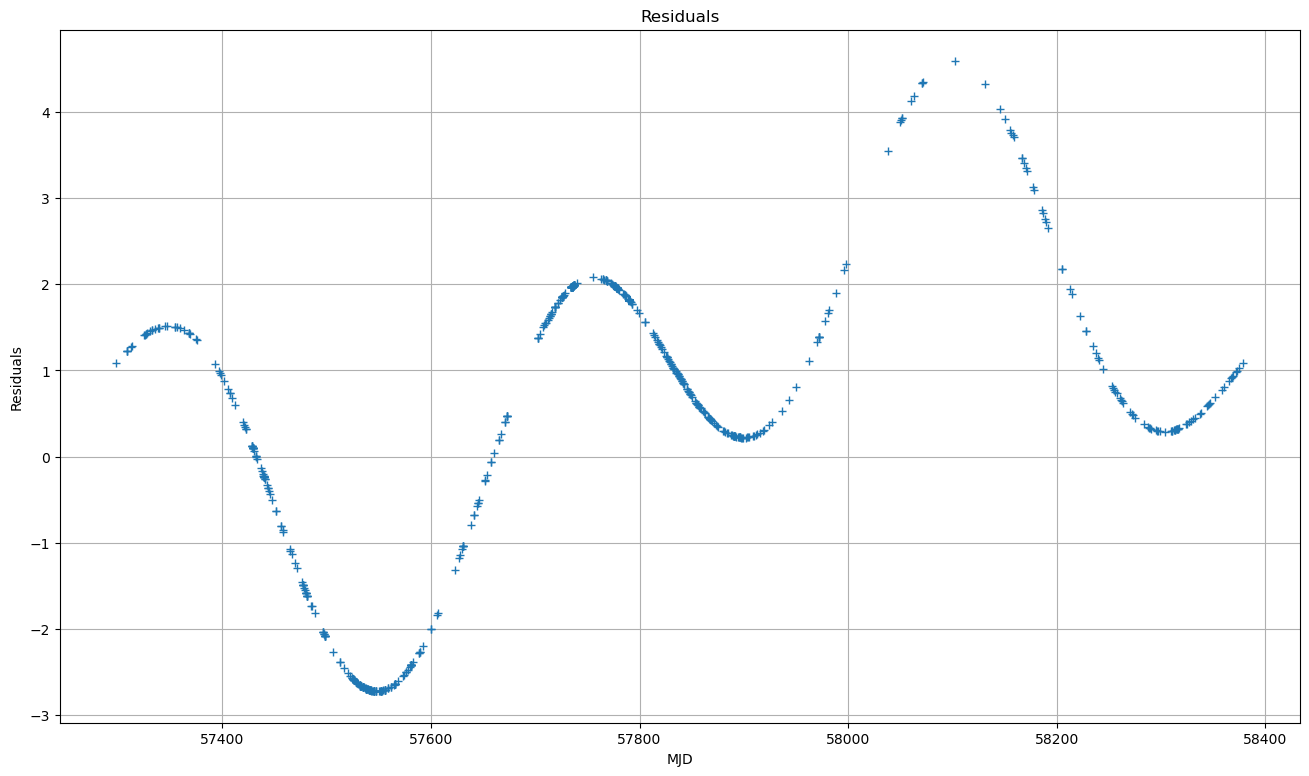

In [16]:
f.plot()